<a href="https://colab.research.google.com/github/Manash-git/Fun-Project-using-Python/blob/master/Web_Scraping_Data_into_Ms_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping Data into MS Excel

## Library Used


1.   request
2.   lxml
3.   Beautiful Soup 4












In [4]:
# importing library
import requests
import bs4
import pandas as pd
import lxml

In [5]:
# make request from web page
url = "https://www.worldometers.info/coronavirus/country/india/"
reply = requests.get(url)

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>India Coronavirus: 6,245,404 Cases and 97,761 Deaths - Worldometer</title>\n<meta name="description" content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline.">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes
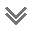

In [7]:
reply.text

In [8]:
# soup object

soup = bs4.BeautifulSoup(reply.text, 'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>India Coronavirus: 6,245,404 Cases and 97,761 Deaths - Worldometer</title>
<meta content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="
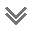

In [9]:
soup

## Find data from different html tag

In [11]:
scrap = soup.find_all('div', class_= 'maincounter-number')

In [12]:
scrap

[<div class="maincounter-number">
 <span style="color:#aaa">6,245,404 </span>
 </div>, <div class="maincounter-number">
 <span>97,761</span>
 </div>, <div class="maincounter-number" style="color:#8ACA2B ">
 <span>5,206,044</span>
 </div>]

In [13]:
data =[]

In [15]:
# Get the data inside span tag

for i in scrap:
  sp = i.find('span')
  # print(sp)
  data.append(sp.string)
  print(data)

['6,245,404 ']
['6,245,404 ', '97,761']
['6,245,404 ', '97,761', '5,206,044']


## Convert the data into DataFrame

In [18]:
df = pd.DataFrame(data)
df.head()

,0
0,"6,245,404"
1,"97,761"
2,"5,206,044"


In [19]:
# naming the column

df.index = ['TotalCases', 'Deaths', 'Recovered']

In [20]:
df

,0
TotalCases,"6,245,404"
Deaths,"97,761"
Recovered,"5,206,044"


## Exporting data to a csv file

In [21]:
df.to_csv('Corona_Data.csv')

In [22]:
!ls


Corona_Data.csv  sample_data
